In [1]:
import random
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import joblib

/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dt

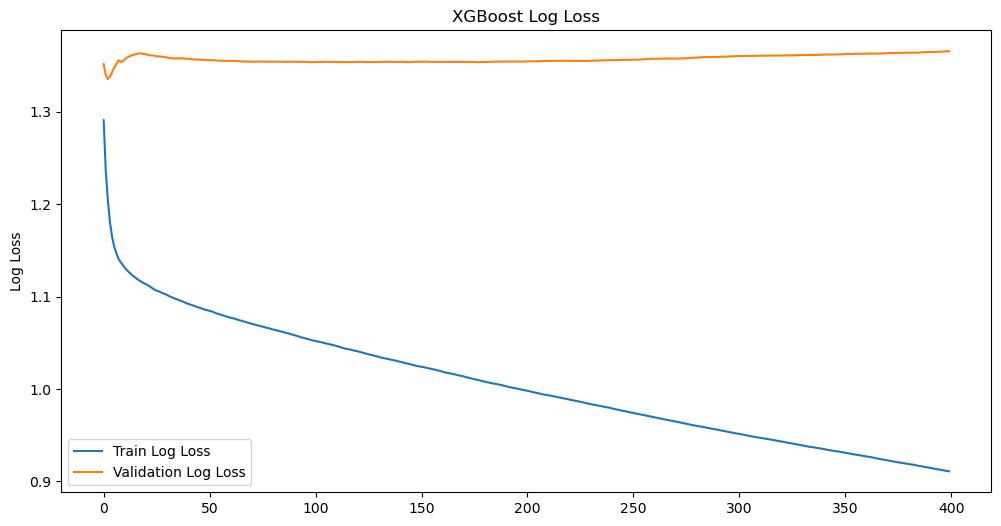

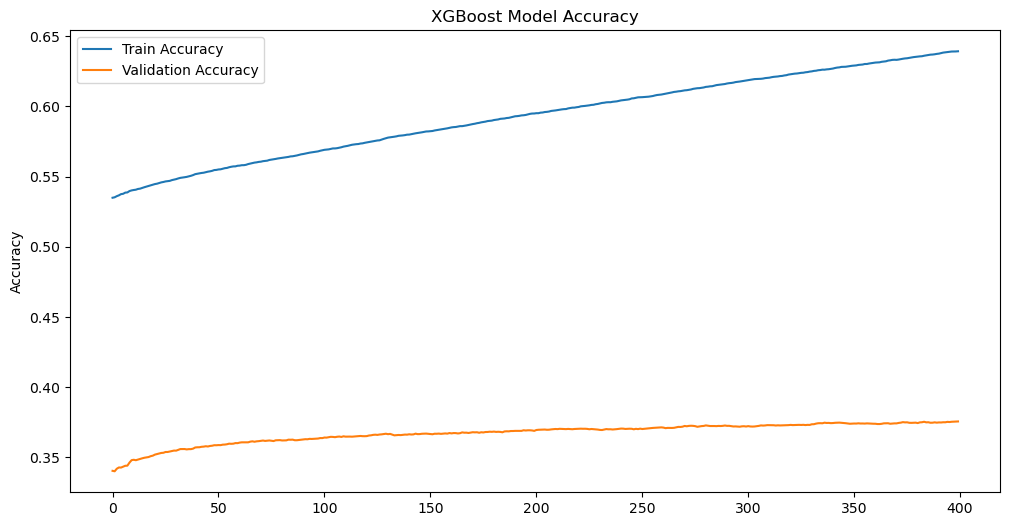

/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dt

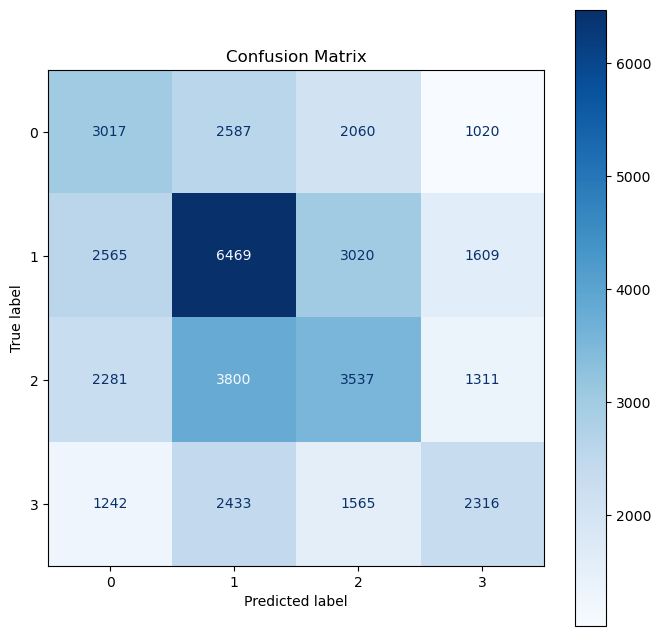

Hyperparameters: {'colsample_bylevel': 0.7, 'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.8}

Class-wise Metrics:
rush_morning - Precision: 0.33, Recall: 0.35, F1-Score: 0.34
rush_evening - Precision: 0.42, Recall: 0.47, F1-Score: 0.45
non_rush_day - Precision: 0.35, Recall: 0.32, F1-Score: 0.34
non_rush_night - Precision: 0.37, Recall: 0.31, F1-Score: 0.34

Macro Averages:
Precision: 0.37, Recall: 0.36, F1-Score: 0.36

Micro Averages:
Precision: 0.38, Recall: 0.38, F1-Score: 0.38


/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dt

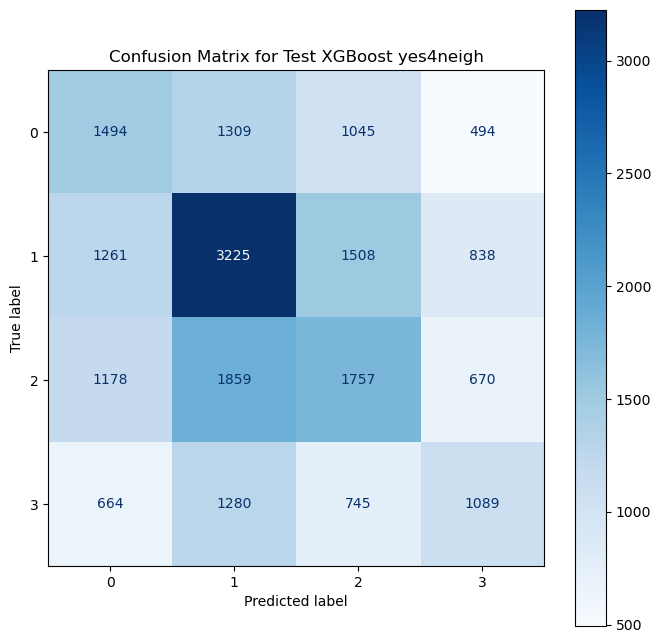

Hyperparameters: {'colsample_bylevel': 0.7, 'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.8}

Class-wise Metrics:
rush_morning - Precision: 0.32, Recall: 0.34, F1-Score: 0.33
rush_evening - Precision: 0.42, Recall: 0.47, F1-Score: 0.44
non_rush_day - Precision: 0.35, Recall: 0.32, F1-Score: 0.33
non_rush_night - Precision: 0.35, Recall: 0.29, F1-Score: 0.32

Macro Averages:
Precision: 0.36, Recall: 0.36, F1-Score: 0.36

Micro Averages:
Precision: 0.37, Recall: 0.37, F1-Score: 0.37


In [2]:
random.seed(42)
train_df = pd.read_csv('../03_Data_for_Modeling/train_xgboost.csv')
X_train = train_df.drop(columns=['time_window'])
y_train = train_df['time_window']

valid_df = pd.read_csv('../03_Data_for_Modeling/val_xgboost.csv')
X_valid = valid_df.drop(columns=['time_window'])
y_valid = valid_df['time_window']

test_df = pd.read_csv('../03_Data_for_Modeling/test_xgboost.csv')
X_test = test_df.drop(columns=['time_window'])
y_test = test_df['time_window']

# Function to calculate and print metrics
def print_metrics(y_true, y_pred):
    class_names = ['rush_morning', 'rush_evening', 'non_rush_day', 'non_rush_night']
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

    print(f"\nClass-wise Metrics:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1-Score: {f1_score[i]:.2f}")

    precision_macro, recall_macro, f1_score_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    precision_micro, recall_micro, f1_score_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro')

    print("\nMacro Averages:")
    print(f"Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1-Score: {f1_score_macro:.2f}")

    print("\nMicro Averages:")
    print(f"Precision: {precision_micro:.2f}, Recall: {recall_micro:.2f}, F1-Score: {f1_score_micro:.2f}")

params = {
    'colsample_bylevel': 0.7,
    'colsample_bytree': 0.9,
    'learning_rate': 0.3,
    'max_depth': 6,
    'n_estimators': 400,
    'subsample': 0.8
}
model = XGBClassifier(
    subsample=params['subsample'],
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    colsample_bytree=params['colsample_bytree'],
    colsample_bylevel=params['colsample_bylevel'],
    objective='multi:softmax',
    num_class=4,
    eval_metric=["mlogloss", "merror"],
    early_stopping_rounds=50
)

# Fit the model on the training data
eval_set = [(X_train, y_train), (X_valid, y_valid)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Get the results from the model
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Plot Log Loss
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train Log Loss')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation Log Loss')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Plot Accuracy
train_accuracy = [1 - x for x in results['validation_0']['merror']]
validation_accuracy = [1 - x for x in results['validation_1']['merror']]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, train_accuracy, label='Train Accuracy')
ax.plot(x_axis, validation_accuracy, label='Validation Accuracy')
ax.legend()
plt.ylabel('Accuracy')
plt.title('XGBoost Model Accuracy')
plt.show()

# Generate and plot the confusion matrix
y_pred = model.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

# Print hyperparameters
print("Hyperparameters:", params)

# Call print_metrics function
print_metrics(y_valid, y_pred)


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Test XGBoost yes4neigh')
plt.show()

# Print hyperparameters
print("Hyperparameters:", params)

# Call print_metrics function
print_metrics(y_test, y_pred)

In [3]:
val_probabilities = model.predict_proba(X_valid)

val_probabilities_df = pd.DataFrame(val_probabilities, columns=model.classes_)

val_probabilities_df.head(10)

/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dt

,0,1,2,3
0,0.078085,0.467090,0.198180,0.256644
1,0.396305,0.313735,0.178398,0.111561
2,0.055245,0.618747,0.167482,0.158526
3,0.024839,0.046818,0.162414,0.765929
4,0.009162,0.020963,0.041170,0.928705
5,0.099491,0.543775,0.252131,0.104602
6,0.078292,0.169970,0.654005,0.097733
7,0.370451,0.239949,0.158705,0.230896
8,0.071616,0.149627,0.063845,0.714911
9,0.217683,0.148061,0.093527,0.540728


In [4]:
test_probabilities = model.predict_proba(X_test)

test_probabilities_df = pd.DataFrame(test_probabilities, columns=model.classes_)

test_probabilities_df.head(10)

/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jiax1/.local/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dt

,0,1,2,3
0,0.791571,0.105452,0.076247,0.026729
1,0.230180,0.253310,0.444535,0.071976
2,0.130245,0.544549,0.286517,0.038689
3,0.171834,0.496742,0.174798,0.156626
4,0.178076,0.059724,0.048216,0.713985
5,0.464248,0.202387,0.291722,0.041643
6,0.169778,0.295492,0.387861,0.146868
7,0.055368,0.085361,0.063027,0.796244
8,0.161918,0.374126,0.418487,0.045469
9,0.191861,0.280628,0.341875,0.185636


In [5]:
val_probabilities_df.to_csv("../03_Data_for_Modeling/val_xgboost_yes4neigh_ensemble_probabilities.csv", index=False)
test_probabilities_df.to_csv("../03_Data_for_Modeling/test_xgboost_yes4neigh_ensemble_probabilities.csv", index=False)